In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler, LabelEncoder
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split
import Preprocessing
import DataProcessing
import model
import utils
data = Preprocessing.load_data('data/rt_iot2022', target_col='Attack_type')

c:\Users\QUIN\anaconda3\envs\PPNKCH\lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
Preprocessing.check_types(data,"object")

proto
service
Attack_type


In [3]:
data = Preprocessing.delete_columns(data, ["Unnamed: 0",'service'])
data = data.loc[:, data.columns.notna()]

data = Preprocessing.one_hot_encode(data, ['proto'])
data = Preprocessing.label_encode(data, ['Attack_type'])
print(data.head(5))

   id.orig_p  id.resp_p  flow_duration  fwd_pkts_tot  bwd_pkts_tot  \
0      38667       1883      32.011598             9             5   
1      51143       1883      31.883584             9             5   
2      44761       1883      32.124053             9             5   
3      60893       1883      31.961063             9             5   
4      51087       1883      31.902362             9             5   

   fwd_data_pkts_tot  bwd_data_pkts_tot  fwd_pkts_per_sec  bwd_pkts_per_sec  \
0                  3                  3          0.281148          0.156193   
1                  3                  3          0.282277          0.156821   
2                  3                  3          0.280164          0.155647   
3                  3                  3          0.281593          0.156440   
4                  3                  3          0.282111          0.156728   

   flow_pkts_per_sec  ...      idle.max      idle.tot      idle.avg  idle.std  \
0           0.437341  .

In [4]:
# Tìm các cột không phải là số (numeric)
non_numeric_cols = data.select_dtypes(exclude=["number"]).columns.tolist()
print("Các cột không phải kiểu số:")
print(non_numeric_cols)


Các cột không phải kiểu số:
['proto_tcp', 'proto_udp']


In [5]:
#Tách cột target ra khỏi dữ liệu
X, y = data.drop('Attack_type', axis=1), data['Attack_type']
# X_balanced, y_balanced = Preprocessing.apply_smote(X, y)
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=42)

In [6]:
#chưa áp dụng smotesmote
X_train_nsm, X_test_nsm, y_train_nsm, y_test_nsm = train_test_split(X,y, test_size=0.2, random_state=42)

# áp dụng smote
X1,y1 = X.copy(), y.copy()
X_sm, y_sm = Preprocessing.apply_smote(X1, y1)
X_train_sm, X_test_sm, y_train_sm, y_test_sm = train_test_split(X_sm, y_sm, test_size=0.2, random_state=42)

In [7]:
# Preprocessing.plot_heatmap(X_train_sm[list['Feature']], y_train_sm,'Attack_type')

In [8]:
# Preprocessing.plot_heatmap(X_train[list['Feature']].drop(dropped_columns, axis=1), y_train,'Attack_type')

Train với dữ liệu chưa giảm chiều

In [9]:
# x2 = X_train[list['Feature']].drop(dropped_columns, axis=1)

In [10]:
# print(len(X_train.columns))

In [11]:
# model_LinearSVC = model.model_LinearSVC(X_train_sm, y_train_sm)
# y_pred = model_LinearSVC.predict(X_test_sm)
# utils.report(y_pred,y_test_sm)

In [12]:
# model_xgboost = model.model_xgboost(X_train_sm, y_train_sm,12)
# y_pred = model_xgboost.predict(X_test_sm)
# utils.report(y_pred,y_test_sm)

In [13]:
# model_logistic_regression = model.model_logistic_regression(X_train_sm, y_train_smsm)
# y_pred = model_logistic_regression.predict(X_test_sm)
# utils.report(y_pred,y_test_sm)

In [14]:
# model_knn = model.model_knn(X_train_sm, y_train_sm)
# y_pred = model_knn.predict(X_test_sm)
# utils.report(y_pred,y_test_sm)

In [15]:
# model_random_forest = model.model_random_forest(X_train_sm, y_train_sm)
# y_pred = model_random_forest.predict(X_test_sm)
# utils.report(y_pred,y_test_sm)

Train với dữ liệu đã giảm chiều

c:\Users\QUIN\Desktop\PPNCKH\DataProcessing.py:29: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=top_features, x='Importance', y='Feature', palette='viridis')


40


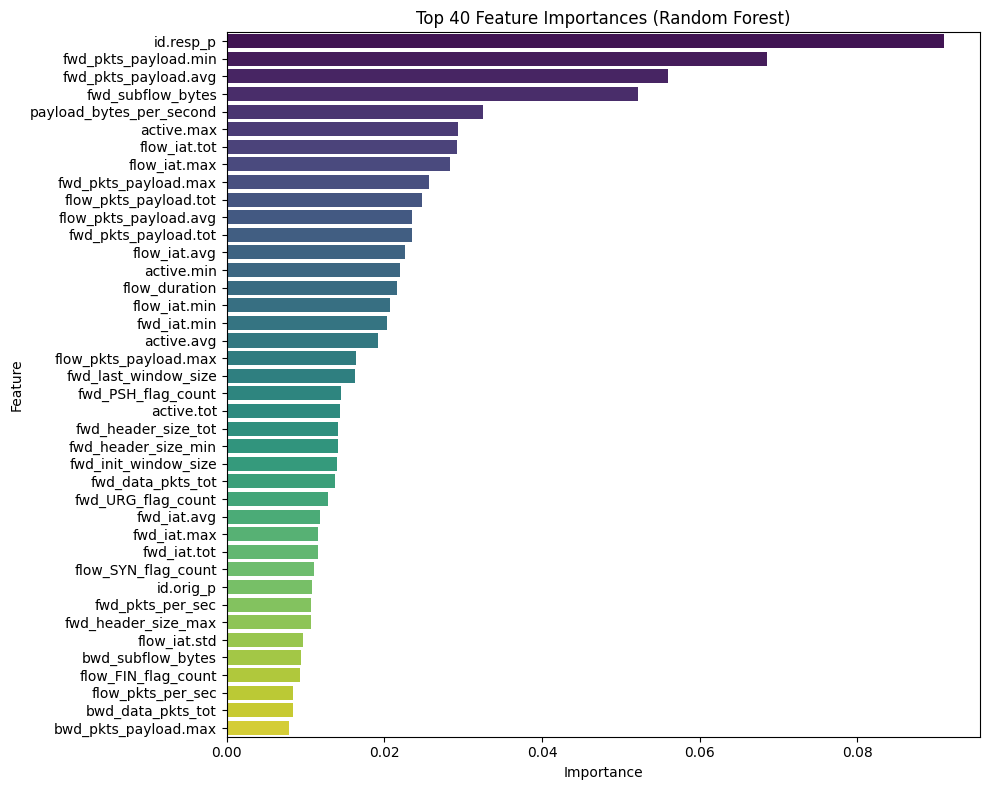

In [16]:
# Xử lý dữ liệu
list = DataProcessing.select_feature(X_train_sm, y_train_sm)
print(len(list))

In [17]:
X_train_sm = X_train_sm[list['Feature']]

In [18]:
df_reduced, dropped_columns = DataProcessing.remove_highly_correlated_columns(X_train_sm[list['Feature']], threshold=0.8)

Các cột bị loại bỏ: ['bwd_data_pkts_tot', 'fwd_pkts_per_sec', 'active.avg', 'fwd_iat.tot', 'fwd_pkts_payload.avg', 'fwd_data_pkts_tot', 'flow_pkts_payload.max', 'fwd_iat.max', 'fwd_header_size_max', 'flow_pkts_per_sec', 'flow_iat.std', 'bwd_subflow_bytes', 'fwd_iat.avg', 'flow_duration', 'bwd_pkts_payload.max', 'flow_iat.avg']


In [19]:
X_train_sm_dr = df_reduced
X_test_sm_dr = X_test_sm[list['Feature']].drop(dropped_columns, axis=1)
y_train_sm_dr = y_train_sm.copy()
y_test_sm_dr = y_test_sm.copy()

In [20]:
model_random_forest = model.model_random_forest(X_train_sm_dr, y_train_sm)
y_pred = model_random_forest.predict(X_test_sm_dr)
utils.report(y_pred,y_test_sm)

Classification Report:
               precision    recall  f1-score   support

           0       0.99      0.99      0.99      1583
           1       1.00      1.00      1.00       412
           2       1.00      1.00      1.00     18898
           3       1.00      1.00      1.00       883
           4       0.99      0.99      0.99       383
           5       1.00      1.00      1.00       397
           6       1.00      1.00      1.00       433
           7       1.00      1.00      1.00       380
           8       1.00      0.99      0.99       504
           9       1.00      1.00      1.00       405
          10       0.99      0.99      0.99      1592
          11       0.99      0.99      0.99       383

    accuracy                           1.00     26253
   macro avg       1.00      1.00      1.00     26253
weighted avg       1.00      1.00      1.00     26253

Confusion Matrix:
 [[ 1560     0     0     1     3     1     0     0     1     0    17     0]
 [    0   411  

In [ ]:
model_mlp = model.model_mlp(X_train_sm_dr, y_train_sm, input_size=X_train_sm_dr.shape[1],
                  hidden_size1=128, hidden_size2=64, output_size=12, epochs=100000)


Đang huấn luyện trên: cuda
Epoch [1/100000], Loss: 420081.0625
Epoch [10/100000], Loss: 273184.4688
Epoch [20/100000], Loss: 144061.1719
Epoch [30/100000], Loss: 112162.2188
Epoch [40/100000], Loss: 93942.1719
Epoch [50/100000], Loss: 77000.5391
Epoch [60/100000], Loss: 63236.0469
Epoch [70/100000], Loss: 50190.7305
Epoch [80/100000], Loss: 36525.5898
Epoch [90/100000], Loss: 25162.7969
Epoch [100/100000], Loss: 14371.1309
Epoch [110/100000], Loss: 5042.9980
Epoch [120/100000], Loss: 3909.2246
Epoch [130/100000], Loss: 3558.3638
Epoch [140/100000], Loss: 3263.9500
Epoch [150/100000], Loss: 3005.2083
Epoch [160/100000], Loss: 2782.0588
Epoch [170/100000], Loss: 2579.4060
Epoch [180/100000], Loss: 2332.7471
Epoch [190/100000], Loss: 2089.6096
Epoch [200/100000], Loss: 2092.4458
Epoch [210/100000], Loss: 2061.5427
Epoch [220/100000], Loss: 2015.9680
Epoch [230/100000], Loss: 1895.8060
Epoch [240/100000], Loss: 1758.9980
Epoch [250/100000], Loss: 1640.3217
Epoch [260/100000], Loss: 1545.96

In [ ]:
y_pred = model.predict_mlp(model_mlp, X_test_sm_dr)
utils.report(y_pred, y_test_sm)


AttributeError: 'MLP' object has no attribute 'predict_mlp'

Train mô hỉnh tinh chỉnh.

In [ ]:
# model_svc_k_linear = model.SVM(X_train, y_train , C=1.0, kernel='linear', gamma='scale')
# model_svc_k_linear_predict = model_svc_k_linear.predict(X_test)
# utils.report(model_svc_k_linear_predict, y_test)

In [ ]:
# model_svc_k_rbf = model.SVM(X_train, y_train,C=1.0, kernel='rbf', gamma='scale')
# model_svc_k_rbf_predict = model_svc_k_rbf.predict(X_test)
# utils.report(model_svc_k_linear_predict, y_test)

In [ ]:
# from sklearn.ensemble import RandomForestClassifier
# from sklearn.metrics import classification_report, confusion_matrix
# # 👉 4. Khởi tạo và huấn luyện mô hình Random Forest
# rf_model = RandomForestClassifier(n_estimators=100,class_weight='balanced', random_state=42)
# rf_model.fit(X_train, y_train)

# # 👉 5. Dự đoán
# y_pred = rf_model.predict(X_test)

# # 👉 6. Đánh giá
# print("Classification Report:\n", classification_report(y_test, y_pred))
# print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))


In [ ]:
# print("Classification Report:\n", classification_report(y_test, y_pred))
# print(y_test.value_counts())
# print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))

In [ ]:
# # kiểm tra hiệu suất
# from sklearn.svm import SVC
# svm = SVC(kernel='linear')
# svm.fit(X_train[list['Feature']].drop(dropped_columns, axis=1), y_train)

# X_test_selected_reduced = X_test.drop(columns=X_train[list['Feature']].drop(dropped_columns, axis=1).columns, errors='ignore')
# accuracy = svm.score(X_test_selected_reduced, y_test)
# print(f"Accuracy on test set after feature reduction: {accuracy:.4f}")

In [ ]:
# #kiểm tra nhãn dạng categorycal
# categorical_columns = data.select_dtypes(include=['object', 'category']).columns
# print(f"Các cột categorical: {list(categorical_columns)}")
# print(f"Số lượng cột categorical: {len(categorical_columns)}")
# for col in categorical_columns:
#     print(f"\nCột '{col}':")
#     print(f"Giá trị duy nhất: {data[col].unique()}")
#     print(f"Số lượng giá trị duy nhất: {data[col].nunique()}")
# #kiểm tra số lượng '-'.
# print(data['service'].value_counts()) # có ther

In [ ]:
#Kiểm tra giá trị null nào không?

In [ ]:
#drop cột service
# data.drop(columns=['service'], inplace=True)

In [ ]:
# # one-hot encoding cho cột categorical
# from sklearn.preprocessing import OneHotEncoder

# # 2. Tạo ví dụ DataFrame
# df  = data

# # 3. Xác định cột cần one-hot encode
# categorical_cols = ['proto']

# # 4. Khởi tạo OneHotEncoder
# encoder = OneHotEncoder(sparse_output=False, handle_unknown='ignore')


# # 5. Fit và transform dữ liệu
# encoded_array = encoder.fit_transform(df[categorical_cols])

# # 6. Lấy tên cột mới sau khi encode
# encoded_col_names = encoder.get_feature_names_out(categorical_cols)

# # 7. Tạo DataFrame từ mảng đã encode
# encoded_df = pd.DataFrame(encoded_array, columns=encoded_col_names)

# # 8. Bỏ các cột cũ & ghép với cột encode mới
# df_encoded = pd.concat([
#     df.drop(columns=categorical_cols).reset_index(drop=True),
#     encoded_df.reset_index(drop=True)
# ], axis=1)

# # 9. In kết quả
# data = df_encoded

In [ ]:
# from sklearn.preprocessing import LabelEncoder
# import pandas as pd

# def label_encode_column(df, column_name):
#     if column_name not in df.columns:
#         raise ValueError(f"Cột '{column_name}' không tồn tại trong DataFrame")
    
#     encoder = LabelEncoder()
    
#     df[column_name] = encoder.fit_transform(df[column_name])
    
#     return df, encoder
# data, encoder = label_encode_column(data, 'Attack_type')
# print(encoder.classes_)


In [ ]:
# import seaborn as sns
# import matplotlib.pyplot as plt
# # Tính ma trận tương quan
# corr_matrix = data.corr(numeric_only=True)
# plt.figure(figsize=(12, 10))
# sns.heatmap(corr_matrix, annot=False, cmap='coolwarm')
# plt.title("Correlation Matrix (without Attack_type)")
# plt.show()


In [ ]:
# import pandas as pd
# def remove_highly_correlated_columns(df, threshold=0.8, target_column=None):
#     # Tính ma trận tương quan
#     corr_matrix = df.corr().abs()  # Lấy giá trị tuyệt đối để xem xét cả tương quan âm
    
#     # Tạo một tập để lưu các cột cần loại bỏ
#     to_drop = set()
    
#     # Duyệt qua ma trận tương quan
#     for i in range(len(corr_matrix.columns)):
#         for j in range(i + 1, len(corr_matrix.columns)):
#             if corr_matrix.iloc[i, j] >= threshold:
#                 colname_i = corr_matrix.columns[i]
#                 colname_j = corr_matrix.columns[j]
                
#                 # Không loại bỏ cột mục tiêu
#                 if target_column and (colname_i == target_column or colname_j == target_column):
#                     continue
                
#                 # Loại bỏ cột có tổng tương quan lớn hơn với các cột khác
#                 if colname_j not in to_drop:
#                     to_drop.add(colname_j)
    
#     # Loại bỏ các cột
#     df_reduced = df.drop(columns=to_drop)
#     dropped_columns = list(to_drop)
    
#     print(f"Các cột bị loại bỏ: {dropped_columns}")
    
#     return df_reduced, dropped_columns
# df_reduced, dropped_columns = remove_highly_correlated_columns(data, threshold=0.8, target_column='attack_type')
    
# print("\nDataFrame sau khi loại bỏ:")
# print(df_reduced)
# print("\nDanh sách các cột bị loại bỏ:")
# print(dropped_columns)


In [ ]:
# import seaborn as sns
# import matplotlib.pyplot as plt
# # Tính ma trận tương quan
# corr_matrix = df_reduced.corr(numeric_only=True)
# plt.figure(figsize=(12, 10))
# sns.heatmap(corr_matrix, annot=False, cmap='coolwarm')
# plt.title("Correlation Matrix (without Attack_type)")
# plt.show()

In [ ]:
# # Vẽ biểu đồ phân phối nhãn
# plt.figure(figsize=(10, 6))
# print(data['Attack_type'].value_counts())
# data['Attack_type'].value_counts().plot(kind='bar')
# plt.title('Phân phối các lớp trong RT-IoT2022')
# plt.xlabel('Nhãn')
# plt.ylabel('Số lượng')
# plt.xticks(rotation=45)
# plt.show()

In [ ]:
# # Kiểm tra giá trị thiếu
# print("\nGiá trị thiếu:")
# print(data.isnull().sum())

In [ ]:
# # 2. Xử lý dữ liệu
# # 2.1. Xử lý giá trị thiếu
# numeric_columns = data.select_dtypes(include=['float64', 'int64']).columns
# data[numeric_columns] = data[numeric_columns].fillna(data[numeric_columns].mean())
# print("\nGiá trị thiếu sau khi xử lý:")
# print(data.isnull().sum())

# # 2.2. Chuẩn hóa đặc trưng
# X = data.drop('Attack_type', axis=1)
# y = data['Attack_type']
# scaler = StandardScaler()
# X_scaled = scaler.fit_transform(X)
# X_scaled = pd.DataFrame(X_scaled, columns=X.columns)

In [ ]:

# # 2.3. Mã hóa nhãn
# encoder = LabelEncoder()
# y_encoded = encoder.fit_transform(y)
# print("\nÁnh xạ nhãn:")
# for label, encoded in zip(encoder.classes_, range(len(encoder.classes_))):
#     print(f"{label}: {encoded}")

In [ ]:

# # 2.4. Xử lý mất cân bằng lớp
# smote = SMOTE(random_state=42)
# X_balanced, y_balanced = smote.fit_resample(X_scaled, y_encoded)
# print("\nPhân phối nhãn sau khi cân bằng:")
# balanced_labels = pd.Series(y_balanced).value_counts()
# for label, count in zip(encoder.classes_, balanced_labels):
#     print(f"{label}: {count}")

# # Vẽ biểu đồ phân phối nhãn sau SMOTE
# plt.figure(figsize=(10, 6))
# pd.Series(y_balanced).value_counts().plot(kind='bar')
# plt.title('Phân phối các lớp sau SMOTE')
# plt.xlabel('Nhãn (mã hóa)')
# plt.ylabel('Số lượng')
# plt.xticks(ticks=range(len(encoder.classes_)), labels=encoder.classes_, rotation=45)
# plt.show()

In [ ]:
# # 3. Chia dữ liệu
# X_train, X_test, y_train, y_test = train_test_split(
#     X_balanced, y_balanced, test_size=0.2, random_state=42, stratify=y_balanced
# )
# print("\nKích thước tập huấn luyện:", X_train.shape, y_train.shape)
# print("Kích thước tập kiểm tra:", X_test.shape, y_test.shape)
# print("\nPhân phối nhãn trong tập huấn luyện:")
# print(pd.Series(y_train).value_counts())
# print("\nPhân phối nhãn trong tập kiểm tra:")
# print(pd.Series(y_test).value_counts())